In [1]:
import numpy as np
import torch
from torch import nn, optim, autograd
from torch.nn import functional as F
from pyDOE import lhs
import scipy.io
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable

from models_all import *

#Paper reproduction
torch.manual_seed(1234)
torch.cuda.manual_seed(1234)
np.random.seed(1234)

In [2]:
PINNs1 = torch.load('../saved_model/PINNs1')
PINNs2 = torch.load('../saved_model/PINNs2')
PINNs3 = torch.load('../saved_model/PINNs3')
PINNs4 = torch.load('../saved_model/PINNs4')
PINNs5 = torch.load('../saved_model/PINNs5')

In [3]:
data = scipy.io.loadmat('./NLS.mat')

t = data['tt'].flatten()[:,None]
x = data['x'].flatten()[:,None]
Exact = data['uu']
Exact_u = np.real(Exact)
Exact_v = np.imag(Exact)
Exact_h = np.sqrt(Exact_u**2 + Exact_v**2)

X, T = np.meshgrid(x,t)

X_star = np.hstack((T.flatten()[:,None], X.flatten()[:,None]))
u_star = Exact_u.T.flatten()[:,None]
v_star = Exact_v.T.flatten()[:,None]
h_star = Exact_h.T.flatten()[:,None]
X_star = torch.from_numpy(X_star).float()

In [4]:
aa = np.sqrt(PINNs1(X_star).detach().numpy()[:,0:1]**2 + PINNs1(X_star).detach().numpy()[:,1:2]**2)
e1 = np.square(aa-h_star)

aa = np.sqrt(PINNs2(X_star).detach().numpy()[:,0:1]**2 + PINNs2(X_star).detach().numpy()[:,1:2]**2)
e2 = np.square(aa-h_star)

aa = np.sqrt(PINNs3(X_star).detach().numpy()[:,0:1]**2 + PINNs3(X_star).detach().numpy()[:,1:2]**2)
e3 = np.square(aa-h_star)

aa = np.sqrt(PINNs4(X_star).detach().numpy()[:,0:1]**2 + PINNs4(X_star).detach().numpy()[:,1:2]**2)
e4 = np.square(aa-h_star)

aa = np.sqrt(PINNs5(X_star).detach().numpy()[:,0:1]**2 + PINNs5(X_star).detach().numpy()[:,1:2]**2)
e5 = np.square(aa-h_star)

In [5]:
e_values = [e1, e2, e3, e4, e5]
vmin=np.min(e5)
vmax=np.max(e5)

In [6]:
lb = np.array([-5.0, 0.0])
ub = np.array([5.0, np.pi/2])

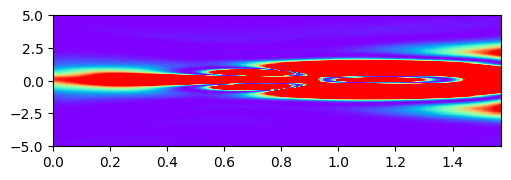

In [7]:
PINNs1.cpu()
fig, ax = plt.subplots()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

h = ax.imshow(e1.reshape(Exact_h.T.shape).T, interpolation='nearest',
              extent=[lb[1], ub[1], lb[0], ub[0]], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,vmax=vmax)

plt.savefig('../figures/Schrodinger_abs_loss_1.pdf',format='pdf',dpi=100, bbox_inches = 'tight')
plt.show()

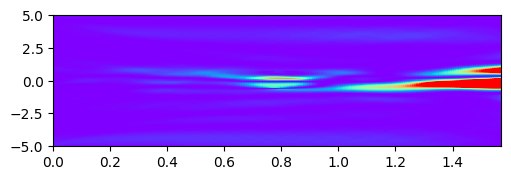

In [8]:
PINNs2.cpu()
fig, ax = plt.subplots()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

h = ax.imshow(e2.reshape(Exact_h.T.shape).T, interpolation='nearest',
              extent=[lb[1], ub[1], lb[0], ub[0]], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,vmax=vmax)

plt.savefig('../figures/Schrodinger_abs_loss_2.pdf',format='pdf',dpi=100, bbox_inches = 'tight')
plt.show()

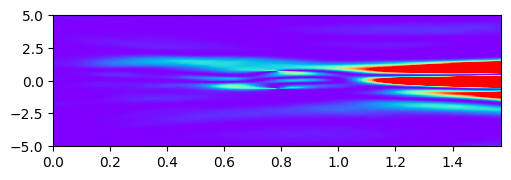

In [9]:
PINNs3.cpu()
fig, ax = plt.subplots()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

h = ax.imshow(e3.reshape(Exact_h.T.shape).T, interpolation='nearest',
              extent=[lb[1], ub[1], lb[0], ub[0]], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,vmax=vmax)

plt.savefig('../figures/Schrodinger_abs_loss_3.pdf',format='pdf',dpi=100, bbox_inches = 'tight')
plt.show()

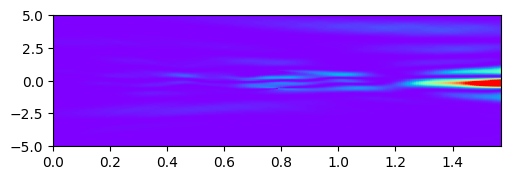

In [10]:
PINNs4.cpu()
fig, ax = plt.subplots()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

h = ax.imshow(e4.reshape(Exact_h.T.shape).T, interpolation='nearest',
              extent=[lb[1], ub[1], lb[0], ub[0]], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,vmax=vmax)

plt.savefig('../figures/Schrodinger_abs_loss_4.pdf',format='pdf',dpi=100, bbox_inches = 'tight')
plt.show()

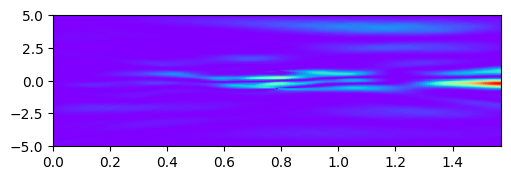

In [11]:
PINNs5.cpu()
fig, ax = plt.subplots()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)
ax = plt.subplot(gs0[:, :])

h = ax.imshow(e5.reshape(Exact_h.T.shape).T, interpolation='nearest',
              extent=[lb[1], ub[1], lb[0], ub[0]], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,vmax=vmax)

plt.savefig('../figures/Schrodinger_abs_loss_5.pdf',format='pdf',dpi=100, bbox_inches = 'tight')
plt.show()

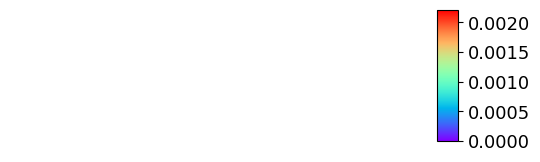

In [12]:
fig = plt.figure()
gs0 = gridspec.GridSpec(1, 2)
gs0.update(top=1-0.06, bottom=1-1/3, left=0.15, right=0.85, wspace=0)

ax = plt.subplot(gs0[:, :])
ax.axis('off')

h = ax.imshow(e5.reshape(Exact_h.T.shape).T, interpolation='nearest',
              extent=[lb[1], ub[1], lb[0], ub[0]], 
              origin='lower', aspect='auto', cmap='rainbow',vmin=vmin,
vmax=vmax)

h.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = fig.colorbar(h, cax=cax)
cb.ax.tick_params(labelsize=13)

ticks = [0.0020,0.0015,0.0010,0.0005,0.0000]
cb.set_ticks(ticks)
cb.ax.tick_params(labelsize=13) 

plt.savefig('../figures/Schrodinger_abs_loss_bar.pdf', dpi=100, format='pdf', bbox_inches='tight')